In [ ]:
#for installing the packages for the 1st time use !pip install [package name]
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#pip install spacy
import spacy
import re
from html import unescape

!pip install emoji
from emoji import UNICODE_EMOJI

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime

import pickle

!pip install spacy

!pip install scipy
import scipy.sparse as sparse

from joblib import Parallel, delayed

In [ ]:
dftrain = pd.read_csv("C:/Users/flore/Desktop/UTS S5/STEM fellowship/sentiment140data/training.data.csv", encoding = "latin-1",names=["predictions","id","timestamp", "query", "user","text"])

In [ ]:
dftrain

,predictions,id,timestamp,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
dftest = pd.read_csv("C:/Users/flore/Desktop/UTS S5/STEM fellowship/sentiment140data/testdata.manual.2009.06.14.csv", encoding = "latin-1",names=["predictions","id","timestamp", "query", "user","text"])

In [ ]:
dftest

,predictions,id,timestamp,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [ ]:
df_chopsticks = pd.read_csv("C:/Users/flore/Desktop/UTS S5/STEM fellowship/dolcegabbanadata/dolcegabbana_chopsticks_mentions_daily_expanded.csv")

In [ ]:
df_all = pd.read_csv("C:/Users/flore/Desktop/UTS S5/STEM fellowship/dolcegabbanadata/dolcegabbana_mentions_daily_all.csv",   lineterminator='\n')

In [ ]:
df_chopsticks

,campaign,id,text,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,author_id,interval_start_date,interval_end_date
0,D&G chopsticks,1064202675682754560,"“Oh yes, I am familiar with East cultures, bec...",2018-11-18T17:04:24.000Z,0,0,0,0,NaN,420256379,2018-11-18 00:00:00,2018-11-19 00:00:00
1,D&G chopsticks,1064178289407901697,"Stereotyping, arrogant and racist. Emphasizing...",2018-11-18T15:27:30.000Z,0,0,1,0,NaN,1019438827822186497,2018-11-18 00:00:00,2018-11-19 00:00:00
2,D&G chopsticks,1064168151141691397,@dolcegabbana These videos don't make sense. W...,2018-11-18T14:47:13.000Z,3,1,29,0,8.577275e+07,2930050458,2018-11-18 00:00:00,2018-11-19 00:00:00
3,D&G chopsticks,1064119452382433280,@dramapotatoe @dolcegabbana I never used chops...,2018-11-18T11:33:42.000Z,0,0,10,0,8.310888e+17,173770885,2018-11-18 00:00:00,2018-11-19 00:00:00
4,D&G chopsticks,1064094563038449669,what’s the point of teaching chinese how to us...,2018-11-18T09:54:48.000Z,0,0,2,0,NaN,186317894,2018-11-18 00:00:00,2018-11-19 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1226,D&G chopsticks,1376112013764624386,"More than 2 years later, @dolcegabbana sues bl...",2021-03-28T10:00:45.000Z,0,0,0,0,NaN,19698834,2021-03-28 00:00:00,2021-03-29 00:00:00
1227,D&G chopsticks,1377072093280395266,The blasphemy of Asian culture by Europe has b...,2021-03-31T01:35:46.000Z,0,0,0,0,NaN,1373645549832786035,2021-03-31 00:00:00,2021-04-01 00:00:00
1228,D&G chopsticks,1380240487118823427,@silentparadise Gabbana appeared to call China...,2021-04-08T19:25:50.000Z,0,1,0,0,1.357498e+18,1391079446,2021-04-08 00:00:00,2021-04-09 00:00:00
1229,D&G chopsticks,1387060244778340355,Part 2: How have #Westernbrands culturally off...,2021-04-27T15:05:07.000Z,1,1,1,0,NaN,1363483322773479432,2021-04-27 00:00:00,2021-04-28 00:00:00


In [ ]:
df_all

,campaign,id,text,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,author_id,interval_start_date,interval_end_date
0,D&G twitter data,4688158780,#dolcegabbana# mynewfavourite.\nthe new layout...,2009-10-07T18:08:32.000Z,0,0,0,0,NaN,66089419,2009-10-07 00:00:00,2009-10-08 00:00:00
1,D&G twitter data,4921523753,@BildArchiv grassy ass! RT @missdreens: http:/...,2009-10-16T17:48:13.000Z,0,0,0,0,6.733706e+07,78174799,2009-10-16 00:00:00,2009-10-17 00:00:00
2,D&G twitter data,5655172931,RT: (Flashback) Alexandra Burke Wore D&G at El...,2009-11-12T17:59:32.000Z,0,0,0,0,NaN,84920988,2009-11-12 00:00:00,2009-11-13 00:00:00
3,D&G twitter data,5800728832,@dolcegabbana no problem!,2009-11-17T17:11:35.000Z,0,0,0,0,8.577275e+07,15325349,2009-11-17 00:00:00,2009-11-18 00:00:00
4,D&G twitter data,5799215897,"in other news, follow @dolcegabbana",2009-11-17T16:09:23.000Z,0,0,0,0,NaN,15325349,2009-11-17 00:00:00,2009-11-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
361578,D&G twitter data,1416977616305893378,@JACKASSVOL2 I remember when @robdyrdek used t...,2021-07-19T04:26:04.000Z,0,0,0,0,1.272182e+09,255577662,2021-07-19 00:00:00,2021-07-20 00:00:00
361579,D&G twitter data,1416963877976240129,So good I had to share! Check out all the item...,2021-07-19T03:31:29.000Z,0,0,0,0,NaN,912871375362195456,2021-07-19 00:00:00,2021-07-20 00:00:00
361580,D&G twitter data,1416960790846840835,@sharonstone @dolcegabbana Stunning! You are s...,2021-07-19T03:19:13.000Z,0,0,3,0,1.949907e+09,28206173,2021-07-19 00:00:00,2021-07-20 00:00:00
361581,D&G twitter data,1416916462913085440,@Memphis @amfAR @dolcegabbana Welcome to you h...,2021-07-19T00:23:04.000Z,0,1,0,0,2.799668e+08,1405574517272068098,2021-07-19 00:00:00,2021-07-20 00:00:00


In [ ]:
# load NLP model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# helper function for pre-processing/cleaning a tweet
def preprocessor(tweet):
    tweet = re.sub (r'@[A-Za-z0-9_]+', '_AT_USER_', tweet) # replace @X with _AT_USER_
    tweet = re.sub (r'#[A-Za-z0-9_]+', '_HASHTAG_', tweet) # replace #X with _HASTHAG_
    tweet = re.sub (r'^RT[\s]+', '', tweet) # remove RT (retweet) at the start of the tweet
    tweet = unescape(tweet) # unescape the HTML
    tweet = tweet.lower() # make everything lowercase
    return tweet

# helper function for tokenization of a tweet
def tokenizer(tweet):
    tokens = nlp(tweet) # this processes the tweet text

    # tokenize each tweet and remove stop words and punctuation 
    tokens = [token for token in tokens if not token.is_stop and not token.is_punct] 
    
    # only keep tokens that are alphanumeric (including "-" and "_") or represent an emoji
    tokens = [t for t in tokens if re.match("^[a-zA-Z0-9_-]*$", t.text) or t.text in UNICODE_EMOJI]

    # lematize tokens
    tokens = [token.lemma_ for token in tokens]

    return tokens

In [ ]:
corpus_chopsticks = list(df_chopsticks['text']) # a list of tweets
corpus_chopsticks
corpus_all = list(df_all['text']) # a list of tweets
corpus_all
corpus_test = list(dftest['text']) # a list of tweets
corpus_test
corpus_train = list(dftrain['text']) # a list of tweets
corpus_train

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i wo

In [ ]:
y_train = list(dftrain['predictions'])
y_test = list(dftest['predictions'])

## SVM
manually: (1)

In [ ]:
model = CountVectorizer(preprocessor=preprocessor, tokenizer=tokenizer, max_features=5000)
word_counts_train = model.fit_transform(corpus_train)
tokens_train = model.get_feature_names()
fitted_model=model

In [ ]:
model_features = model.get_feature_names()

In [ ]:
word_counts_test = fitted_model.transform(corpus_test)

In [ ]:
word_counts_chopsticks = fitted_model.transform(corpus_chopsticks)
word_counts_all = fitted_model.transform(corpus_all)

In [ ]:
fitted_model

In [ ]:
# use TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_140 = tfidf_transformer.fit_transform(word_counts_train) # training
X_test = tfidf_transformer.transform(word_counts_test) # testing
X_chopsticks = tfidf_transformer.transform(word_counts_chopsticks) # training
X_all =  tfidf_transformer.transform(word_counts_all) 

In [ ]:
X_140

In [ ]:
X_train, X_validation, y_trainsmall, y_validation = train_test_split(X_140, y_train, test_size=0.10, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

loading: (1)

In [ ]:
fitted_model = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/model_path", 'rb'))

model_features = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/model_features.npy', allow_pickle=True)

word_counts_test = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/word_counts_test.npz')
word_counts_chopsticks = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/word_counts_chopsticks.npz')
word_counts_all = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/word_counts_all.npz')
word_counts_train = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/word_counts_train.npz')

X_140 = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/X_140.npz')
X_test = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/X_test.npz')
X_chopsticks = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/X_chopsticks.npz')
X_all = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/X_all.npz')

X_train = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/X_train.npz')
X_validation = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/X_validation.npz')
y_trainsmall = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_trainsmall.npy', allow_pickle=True)
y_validation = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_validation.npy', allow_pickle=True)
y_test = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_test.npy', allow_pickle=True)

In [ ]:
X_validation

<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 57685 stored elements in Compressed Sparse Row format>

manual svc: (2)

In [ ]:
# fit SVC model with default parameters
svc_model = SVC(kernel='linear', C=0.1, probability=True)
svc_model.fit(X_train, y_trainsmall)

In [ ]:
# prediction on training
y_train_pred_svc = svc_model.predict(X_train)
y_train_proba_svc = svc_model.predict_proba(X_train)

# prediction on validation
y_validation_pred_svc = svc_model.predict(X_validation)
y_validation_proba_svc = svc_model.predict_proba(X_validation)

# prediction on chopsticks
y_chopsticks_pred_svc = svc_model.predict(X_chopsticks)
y_chopsticks_proba_svc = svc_model.predict_proba(X_chopsticks)

# prediction on d&g overall
y_all_pred_svc = svc_model.predict(X_all)
y_all_proba_svc = svc_model.predict_proba(X_all)

In [ ]:
print('Training performance')
print(classification_report(y_trainsmall, y_train_pred_svc))
print()
print('====================')
print()
print('Validation performance')
print(classification_report(y_validation, y_validation_pred_svc))

In [ ]:
plt.figure()
plt.hist(y_validation_proba_svc[:,1])
plt.xlabel('Predicted probability')
plt.ylabel('Number of tweets')
plt.title('Predicted probability distirbution training')
plt.show()

loading svc: (2)

In [ ]:
svc_model = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/svc_model", 'rb'))

y_train_pred_svc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_train_pred_svc.npy', allow_pickle=True)
y_train_proba_svc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_train_proba_svc.npy', allow_pickle=True)
y_validation_pred_svc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_validation_pred_svc.npy', allow_pickle=True)
y_validation_proba_svc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_validation_proba_svc.npy', allow_pickle=True)
y_chopsticks_pred_svc_binary = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_chopsticks_pred_svc_binary.npy', allow_pickle=True)
y_chopsticks_proba_svc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_chopsticks_proba_svc.npy', allow_pickle=True)
y_all_pred_svc_binary = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_all_pred_svc_binary.npy', allow_pickle=True)
y_all_proba_svc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_all_proba_svc.npy', allow_pickle=True)

manual 140test / probability: (3)

In [ ]:
# prediction on testing (once hyperparameters are tuned)
y_test_pred_svc_binary = svc_model.predict(X_test)
y_test_proba_svc = svc_model.predict_proba(X_test)

In [ ]:
plt.figure()
plt.hist(y_chopsticks_proba_svc[:,1])
plt.xlabel('Predicted probability')
plt.ylabel('Number of tweets')
plt.title('Predicted probability distribution validation')
plt.show()

In [ ]:
plt.figure()
plt.hist(y_all_proba_svc[:,1])
plt.xlabel('Predicted probability')
plt.ylabel('Number of tweets')
plt.title('Predicted probability distribution validation')
plt.show()

In [ ]:
y_chopsticks_proba_svc

In [ ]:
topacc = 0
top_a = 0
top_b = 0
for i in range (10):
    a = 0.5+(i*0.01)
    for i in range (10):
        y_test_pred_svc_binary = []
        b = 0.76-(i*0.01)
        for i in range (len(y_test_proba_svc)):
            if (y_test_proba_svc[i,1])<a:
                y_test_pred_svc_binary.append(0)
            elif(y_test_proba_svc[i,1])>b:
                y_test_pred_svc_binary.append(4)
            else:
                y_test_pred_svc_binary.append(2)
        accuracy = accuracy_score(y_test, y_test_pred_svc_binary)
        if accuracy > topacc:
            topacc = accuracy
            top_a = a
            top_b = b
            top_y_pred = y_test_pred_svc_binary
            print("acc = " + str(accuracy)+ " a = "+str(a)+" b = "+str(b))
            
        
print("overall top acc = "+str(topacc)+ " a = "+str(top_a)+" b = "+str(top_b))


In [ ]:
#best cutoff values: 0.5 + 0.69 (positive proba(second column))
y_test_pred_svc = top_y_pred

In [ ]:
print('Testing performance')
print(classification_report(y_test, y_test_pred_svc))

In [ ]:
y_chopsticks_pred_svc = []
for i in range (len(y_chopsticks_proba_svc)):
            if (y_chopsticks_proba_svc[i,1])<0.5:
                y_chopsticks_pred_svc.append(0)
            elif(y_chopsticks_proba_svc[i,1])>0.69:
                y_chopsticks_pred_svc.append(4)
            else:
                y_chopsticks_pred_svc.append(2)
y_all_pred_svc = []
for i in range (len(y_all_proba_svc)):
            if (y_all_proba_svc[i,1])<0.5:
                y_all_pred_svc.append(0)
            elif(y_all_proba_svc[i,1])>0.69:
                y_all_pred_svc.append(4)
            else:
                y_all_pred_svc.append(2)

In [ ]:
# see where model predicted wrong
for i in range(len(y_test_pred_svc)):
  if y_test[i] != y_test_pred_svc[i]:
    tweet = corpus_test[i]
    print(f'y_true {y_test[i]}, y_pred {y_test_pred_svc[i]}')
    print(tweet)
    print()

loading probability: (3)

In [ ]:
y_test_proba_svc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_test_proba_svc.npy', allow_pickle=True)
y_test_pred_svc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_test_pred_svc.npy', allow_pickle=True)
y_chopsticks_pred_svc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_chopsticks_pred_svc.npy', allow_pickle=True)
y_all_pred_svc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/y_all_pred_svc.npy', allow_pickle=True)

manually adding predictions to df: (4)

In [ ]:
df_all

In [ ]:
df_chopsticks

In [ ]:
y_chopsticks_proba_svc

In [ ]:
df_chopsticks['pred_label'] = y_chopsticks_pred_svc
df_all['pred_label'] = y_all_pred_svc

df_chopsticks['pred_score'] = y_chopsticks_proba_svc [:,1]
df_all[ 'pred_score'] = y_all_proba_svc [:,1]

In [ ]:
# Changing object type column to datetime
df_chopsticks['interval_start_date'] = pd.to_datetime(df_chopsticks['interval_start_date'])
df_chopsticks['created_at'] = pd.to_datetime(df_chopsticks['created_at'])
df_chopsticks['date'] = df_chopsticks['created_at'].dt.date # Creating new column with just the date
df_chopsticks['date'] = pd.to_datetime(df_chopsticks['date'])

# get week start date to aggregate over weeks
df_chopsticks['week_start_date'] = df_chopsticks['date'].apply(lambda x: x - datetime.timedelta(days=x.weekday()))
df_chopsticks['week_start_date'] = df_chopsticks['week_start_date'].dt.date
df_chopsticks.head()

# Changing object type column to datetime
df_all['interval_start_date'] = pd.to_datetime(df_all['interval_start_date'])
df_all['created_at'] = pd.to_datetime(df_all['created_at'])
df_all['date'] = df_all['created_at'].dt.date # Creating new column with just the date
df_all['date'] = pd.to_datetime(df_all['date'])

# get week start date to aggregate over weeks
df_all['week_start_date'] = df_all['date'].apply(lambda x: x - datetime.timedelta(days=x.weekday()))
df_all['week_start_date'] = df_all['week_start_date'].dt.date
df_all.head()

In [ ]:
# positive is going to be defined as greater than 80% prediction score that it is positive (adjustable based on threshold)
df_all_pos = df_all[(df_all['pred_label'] == 4)&(df_all['pred_score']>0.8)]

# negative is going to be defined as greater than 80% prediction score that it is negative (adjustable based on threshold)
df_all_neg = df_all[(df_all['pred_label'] == 0)&(df_all['pred_score']<0.4)]

# positive is going to be defined as greater than 80% prediction score that it is positive (adjustable based on threshold)
df_chopsticks_pos = df_chopsticks[(df_chopsticks['pred_label'] == 4)&(df_chopsticks['pred_score']>0.8)]

# negative is going to be defined as greater than 80% prediction score that it is negative (adjustable based on threshold)
df_chopsticks_neg = df_chopsticks[(df_chopsticks['pred_label'] == 0)&(df_chopsticks['pred_score']<0.2)]

In [ ]:
df_all_neg

loading predictions to df: (4)

In [ ]:
df_chopsticks = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/df_chopsticks_pred.pkl')
df_chopsticks_pos = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/df_chopsticks_pos.pkl')
df_chopsticks_neg = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/df_chopsticks_neg.pkl')

df_all = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/df_all_pred.pkl')
df_all_pos = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/df_all_pos.pkl')
df_all_neg = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/df_all_neg.pkl')

manually sorting by week: (5)

In [ ]:
# aggregate data and get aggregated statistics
pos_byweek_all = df_all_pos.groupby(by=['week_start_date']).agg({'retweet_count': ['sum']}).reset_index() # for positive tweets, get total retweets each week (sum of num retweets column over each week)
pos_byweek_all.columns = ['date', 'total_retweets']

neg_byweek_all = df_all_neg.groupby(by=['week_start_date']).agg({'retweet_count': ['sum']}).reset_index() # for negative tweets, get total retweets each week (sum of num retweets column over each week)
neg_byweek_all.columns = ['date', 'total_retweets']

# aggregate data and get aggregated statistics
pos_byweek_chopsticks = df_chopsticks_pos.groupby(by=['week_start_date']).agg({'retweet_count': ['sum']}).reset_index() # for positive tweets, get total retweets each week (sum of num retweets column over each week)
pos_byweek_chopsticks.columns = ['date', 'total_retweets']

neg_byweek_chopsticks = df_chopsticks_neg.groupby(by=['week_start_date']).agg({'retweet_count': ['sum']}).reset_index() # for negative tweets, get total retweets each week (sum of num retweets column over each week)
neg_byweek_chopsticks.columns = ['date', 'total_retweets']

In [ ]:
# for each week, get list of tweets with the highest number of retweets (which you can manually review to see what was trending that week)
top_tweets_peak_weeks_all = df_all.sort_values(by='retweet_count', ascending=False)
top_tweets_peak_weeks_all = top_tweets_peak_weeks.groupby('week_start_date').head(10).sort_values(by=['week_start_date', 'retweet_count'], ascending=False)
top_tweets_peak_weeks_all
#top_tweets_peak_weeks.to_csv(os.path.join(data_dir, 'top_tweets_peak_weeks.csv'), index=False)

In [ ]:
# for each week, get list of tweets with the highest number of retweets (which you can manually review to see what was trending that week)
top_tweets_peak_weeks_chopsticks = df_chopsticks.sort_values(by='retweet_count', ascending=False)
top_tweets_peak_weeks_chopsticks = top_tweets_peak_weeks_chopsticks.groupby('week_start_date').head(10).sort_values(by=['week_start_date', 'retweet_count'], ascending=False)
top_tweets_peak_weeks_chopsticks
#top_tweets_peak_weeks.to_csv(os.path.join(data_dir, 'top_tweets_peak_weeks.csv'), index=False)

loading by week: (5)

In [ ]:
pos_byweek_chopsticks = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/pos_byweek_chopsticks.pkl')
neg_byweek_chopsticks = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/neg_byweek_chopsticks.pkl')
top_tweets_peak_weeks_chopsticks = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/top_tweets_peak_weeks_chopsticks.pkl')


pos_byweek_all = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/pos_byweek_all.pkl')
neg_byweek_all = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/neg_byweek_all.pkl')
top_tweets_peak_weeks_all = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/top_tweets_peak_weeks_all.pkl')


manual tweet #: (5b)

In [ ]:
countlist = []
for i in range (len(df_all_pos)):
    countlist.append(1)
    
df_all_pos['counting'] = countlist
df_all_pos

pos_byweek_tweets_all = df_all_pos.groupby(by=['week_start_date']).agg({'counting': ['sum']}).reset_index() 
pos_byweek_tweets_all.columns = ['date', '# of tweets']
pos_byweek_tweets_all


,date,# of tweets
0,2009-10-05,1
1,2009-11-16,9
2,2009-11-23,5
3,2009-11-30,6
4,2009-12-07,3
...,...,...
606,2021-06-21,253
607,2021-06-28,349
608,2021-07-05,208
609,2021-07-12,436


In [ ]:
countlist = []
for i in range (len(df_chopsticks_pos)):
    countlist.append(1)
    
df_chopsticks_pos['counting'] = countlist
df_chopsticks_pos

pos_byweek_tweets_chopsticks = df_chopsticks_pos.groupby(by=['week_start_date']).agg({'counting': ['sum']}).reset_index() 
pos_byweek_tweets_chopsticks.columns = ['date', '# of tweets']
pos_byweek_tweets_chopsticks

,date,# of tweets
0,2018-11-19,47
1,2018-11-26,7
2,2019-01-21,11
3,2019-02-04,1
4,2019-02-18,1
5,2019-04-01,3
6,2019-04-08,43
7,2019-04-15,4
8,2019-04-29,1
9,2019-05-06,1


In [ ]:
countlist = []
for i in range (len(df_chopsticks_neg)):
    countlist.append(1)
    
df_chopsticks_neg['counting'] = countlist
df_chopsticks_neg

neg_byweek_tweets_chopsticks = df_chopsticks_neg.groupby(by=['week_start_date']).agg({'counting': ['sum']}).reset_index() 
neg_byweek_tweets_chopsticks.columns = ['date', '# of tweets']
neg_byweek_tweets_chopsticks

,date,# of tweets
0,2018-11-19,70
1,2018-11-26,7
2,2018-12-03,1
3,2019-02-04,2
4,2019-04-08,1
5,2020-04-13,1


In [ ]:
countlist = []
for i in range (len(df_all_neg)):
    countlist.append(1)
    
df_all_neg['counting'] = countlist
df_all_neg

neg_byweek_tweets_all = df_all_neg.groupby(by=['week_start_date']).agg({'counting': ['sum']}).reset_index() 
neg_byweek_tweets_all.columns = ['date', '# of tweets']
neg_byweek_tweets_all

,date,# of tweets
0,2010-01-04,1
1,2010-01-11,2
2,2010-02-15,2
3,2010-02-22,5
4,2010-03-08,1
...,...,...
565,2021-06-14,2
566,2021-06-21,9
567,2021-06-28,3
568,2021-07-05,5


In [ ]:
pickle.dump(neg_byweek_tweets_chopsticks, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/neg_byweek_tweets_chopsticks.pkl", "wb")) 
pickle.dump(neg_byweek_tweets_all, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/neg_byweek_tweets_all.pkl", "wb")) 
pickle.dump(pos_byweek_tweets_chopsticks, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/pos_byweek_tweets_chopsticks.pkl", "wb")) 
pickle.dump(pos_byweek_tweets_all, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/pos_byweek_tweets_all.pkl", "wb")) 

loading tweet #: (5b)

In [ ]:
neg_byweek_tweets_chopsticks = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/neg_byweek_tweets_chopsticks.pkl", 'rb'))
neg_byweek_tweets_all = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/neg_byweek_tweets_all.pkl", 'rb'))
pos_byweek_tweets_chopsticks = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/pos_byweek_tweets_chopsticks.pkl", 'rb'))
pos_byweek_tweets_all = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/100k train/pos_byweek_tweets_all.pkl", 'rb'))

manually making time series graphs: (6)

In [ ]:
# plot number of retweets over time (aggregated over each week) for positive and negative tweets
fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(pos_byweek_all["date"], pos_byweek_all['total_retweets'], c='blue', label='Positive tweets')
ax.plot(neg_byweek_all["date"], neg_byweek_all['total_retweets'], c='red', label='Negative tweets')

"""
# format the vertical lines and annotations
y = {
  0: 20000,
  1: 40000,
  2: 30000,
  3: 60000,
  4: 80000,
  5: 50000,
  6: 40000,
  7: 40000,
  8: 60000,
  9: 80000,
  10: 40000,
  11: 140000,
  12: 120000,
  13: 100000,
  14: 160000,
  15: 160000,
  16: 100000,
  17: 120000,
}
"""

y_offset = 10000
left_align = [1, 4, 5, 8, 9, 10, 15, 16, 17]

"""
# vertical line for major events
for i in range(len(dates)):
  date = dates[i]
  event = events[i]
  if i in left_align:
    align = 'left'
  else:
    align = 'right'
  plt.axvline(x=date, color='grey', linestyle=':')
  ax.text(date, y[i]-y_offset, event, ha=align, size=10)
"""

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest half of year.
datemin = np.datetime64(datetime.date(2013, 7, 1), 'm')
datemax = np.datetime64(datetime.date(2021, 7, 1), 'm')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Label the axes
ax.set(xlabel='Date', ylabel='Weekly total retweet count')
ax.set_ylim([0, 10000]) # scale the y-axis range

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()
plt.legend() # add the legend

plt.show()

In [ ]:
# plot number of retweets over time (aggregated over each week) for positive and negative tweets
fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(neg_byweek_all["date"], neg_byweek_all['total_retweets'], c='red', label='Negative tweets')

"""
# format the vertical lines and annotations
y = {
  0: 20000,
  1: 40000,
  2: 30000,
  3: 60000,
  4: 80000,
  5: 50000,
  6: 40000,
  7: 40000,
  8: 60000,
  9: 80000,
  10: 40000,
  11: 140000,
  12: 120000,
  13: 100000,
  14: 160000,
  15: 160000,
  16: 100000,
  17: 120000,
}
"""

y_offset = 10000
left_align = [1, 4, 5, 8, 9, 10, 15, 16, 17]

"""
# vertical line for major events
for i in range(len(dates)):
  date = dates[i]
  event = events[i]
  if i in left_align:
    align = 'left'
  else:
    align = 'right'
  plt.axvline(x=date, color='grey', linestyle=':')
  ax.text(date, y[i]-y_offset, event, ha=align, size=10)
"""

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest half of year.
datemin = np.datetime64(datetime.date(2013, 7, 1), 'm')
datemax = np.datetime64(datetime.date(2021, 7, 1), 'm')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Label the axes
ax.set(xlabel='Date', ylabel='Weekly total retweet count')
ax.set_ylim([0, 1000]) # scale the y-axis range

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()
plt.legend() # add the legend

plt.show()

samething but tweet #: (6b)

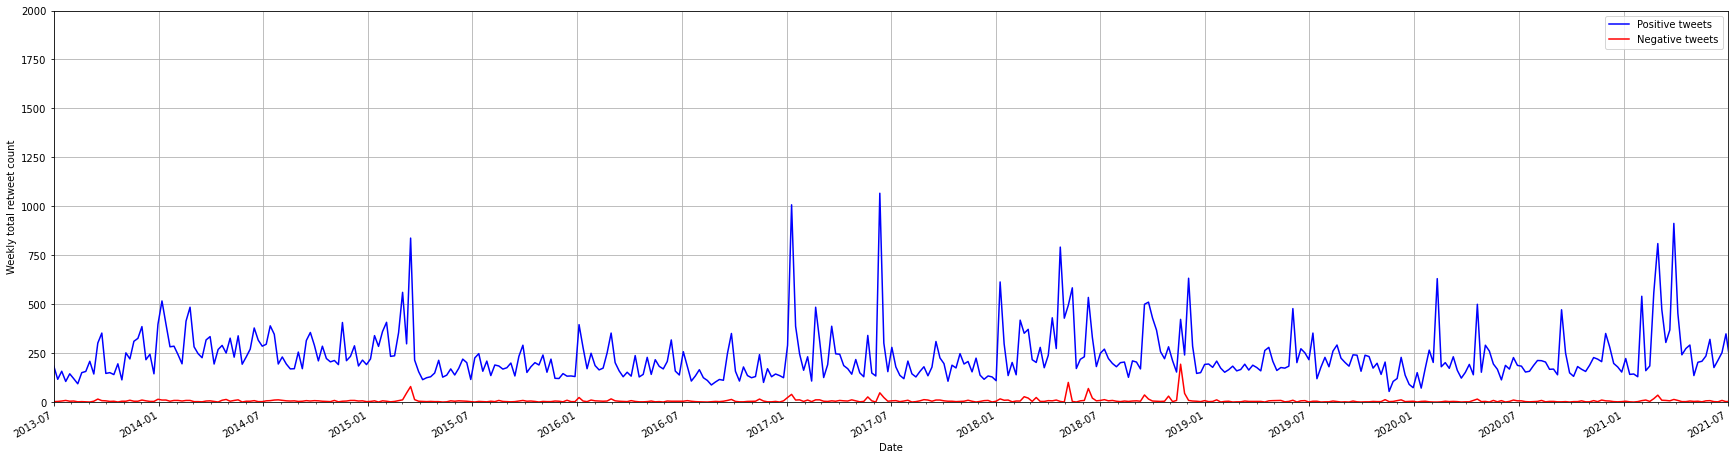

In [ ]:
# plot number of retweets over time (aggregated over each week) for positive and negative tweets
fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(pos_byweek_tweets_all["date"], pos_byweek_tweets_all['# of tweets'], c='blue', label='Positive tweets')
ax.plot(neg_byweek_tweets_all["date"], neg_byweek_tweets_all['# of tweets'], c='red', label='Negative tweets')

"""
# format the vertical lines and annotations
y = {
  0: 20000,
  1: 40000,
  2: 30000,
  3: 60000,
  4: 80000,
  5: 50000,
  6: 40000,
  7: 40000,
  8: 60000,
  9: 80000,
  10: 40000,
  11: 140000,
  12: 120000,
  13: 100000,
  14: 160000,
  15: 160000,
  16: 100000,
  17: 120000,
}
"""

y_offset = 10000
left_align = [1, 4, 5, 8, 9, 10, 15, 16, 17]

"""
# vertical line for major events
for i in range(len(dates)):
  date = dates[i]
  event = events[i]
  if i in left_align:
    align = 'left'
  else:
    align = 'right'
  plt.axvline(x=date, color='grey', linestyle=':')
  ax.text(date, y[i]-y_offset, event, ha=align, size=10)
"""

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest half of year.
datemin = np.datetime64(datetime.date(2013, 7, 1), 'm')
datemax = np.datetime64(datetime.date(2021, 7, 1), 'm')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Label the axes
ax.set(xlabel='Date', ylabel='Weekly total retweet count')
ax.set_ylim([0, 2000]) # scale the y-axis range

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()
plt.legend() # add the legend

plt.show()

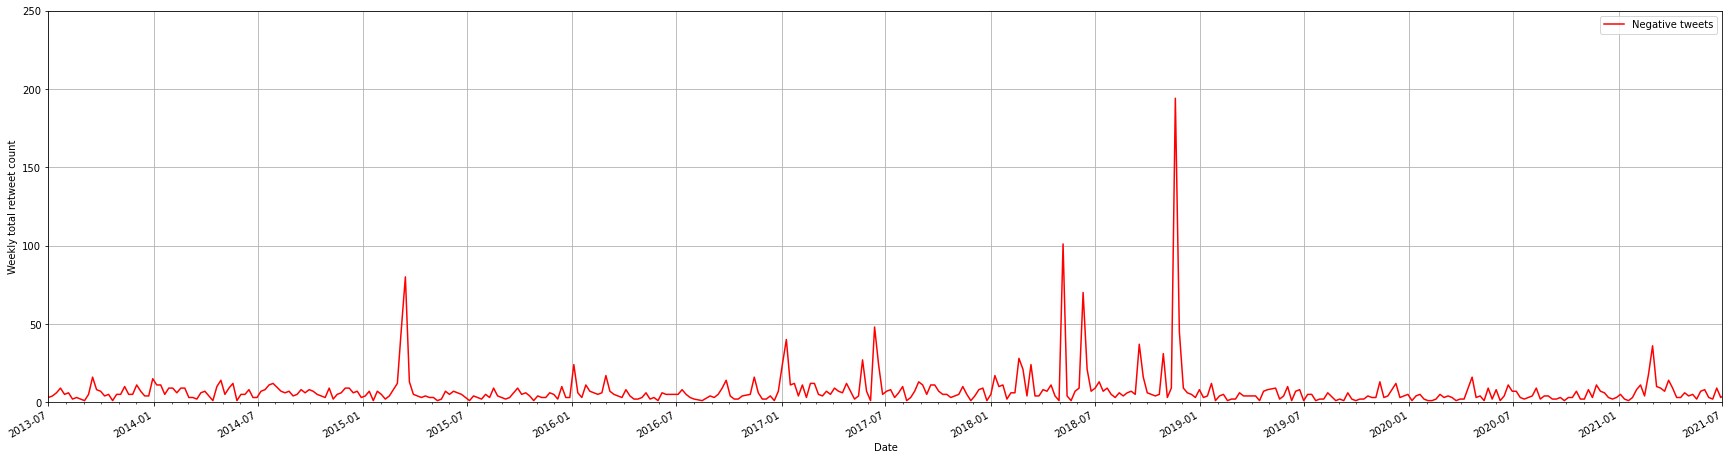

In [ ]:
# plot number of retweets over time (aggregated over each week) for positive and negative tweets
fig, ax = plt.subplots(figsize=(30, 8))
#ax.plot(pos_byweek_tweets_chopsticks["date"], pos_byweek_tweets_chopsticks['# of tweets'], c='blue', label='Positive tweets')
ax.plot(neg_byweek_tweets_all["date"], neg_byweek_tweets_all['# of tweets'], c='red', label='Negative tweets')

"""
# format the vertical lines and annotations
y = {
  0: 20000,
  1: 40000,
  2: 30000,
  3: 60000,
  4: 80000,
  5: 50000,
  6: 40000,
  7: 40000,
  8: 60000,
  9: 80000,
  10: 40000,
  11: 140000,
  12: 120000,
  13: 100000,
  14: 160000,
  15: 160000,
  16: 100000,
  17: 120000,
}
"""

y_offset = 10000
left_align = [1, 4, 5, 8, 9, 10, 15, 16, 17]

"""
# vertical line for major events
for i in range(len(dates)):
  date = dates[i]
  event = events[i]
  if i in left_align:
    align = 'left'
  else:
    align = 'right'
  plt.axvline(x=date, color='grey', linestyle=':')
  ax.text(date, y[i]-y_offset, event, ha=align, size=10)
"""

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest half of year.
datemin = np.datetime64(datetime.date(2013, 7, 1), 'm')
datemax = np.datetime64(datetime.date(2021, 7, 1), 'm')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Label the axes
ax.set(xlabel='Date', ylabel='Weekly total retweet count')
ax.set_ylim([0, 250]) # scale the y-axis range

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()
plt.legend() # add the legend

plt.show()

## RFC
manually tokenizing:

In [ ]:
model = CountVectorizer(preprocessor=preprocessor, tokenizer=tokenizer, max_features=5000)
word_counts_train = model.fit_transform(corpus_train)
tokens_train = model.get_feature_names()
fitted_model=model

In [ ]:
pickle.dump(fitted_model, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/fitted_model.pkl", "wb")) 
pickle.dump(model_features, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/model_features", 'wb'))

sparse.save_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/word_counts_train.npz', word_counts_train, compressed=True)
sparse.save_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/word_counts_chopsticks.npz', word_counts_chopsticks, compressed=True)
sparse.save_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/word_counts_test.npz', word_counts_test, compressed=True)
sparse.save_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/word_counts_all.npz', word_counts_all, compressed=True)

sparse.save_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_140.npz', X_140, compressed=True)
sparse.save_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_test.npz', X_test, compressed=True)
sparse.save_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_chopsticks.npz', X_chopsticks, compressed=True)
sparse.save_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_all.npz', X_all, compressed=True)

sparse.save_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_train.npz', X_train, compressed=True)
sparse.save_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_validation.npz', X_validation, compressed=True)
pickle.dump(y_trainsmall, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_trainsmall", 'wb'))
pickle.dump(y_validation, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_validation", 'wb'))
pickle.dump(y_test, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_test", 'wb'))


In [ ]:
model_features = model.get_feature_names()

In [ ]:
word_counts_test = fitted_model.transform(corpus_test)

In [ ]:
word_counts_chopsticks = fitted_model.transform(corpus_chopsticks)
word_counts_all = fitted_model.transform(corpus_all)

In [ ]:
fitted_model

CountVectorizer(max_features=5000,
                preprocessor=<function preprocessor at 0x000002F086CE8CA0>,
                tokenizer=<function tokenizer at 0x000002F086CE8EE0>)

In [ ]:
# use TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_140 = tfidf_transformer.fit_transform(word_counts_train) # training
X_test = tfidf_transformer.transform(word_counts_test) # testing
X_chopsticks = tfidf_transformer.transform(word_counts_chopsticks) # training
X_all =  tfidf_transformer.transform(word_counts_all) 

In [ ]:
X_140

<1600000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 9167786 stored elements in Compressed Sparse Row format>

In [ ]:
X_train, X_validation, y_trainsmall, y_validation = train_test_split(X_140, y_train, test_size=0.10, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(1440000, 5000)
(160000, 5000)
(498, 5000)


loading tokenized data: (1)

In [ ]:
#loading vectorizer path
fitted_model = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/fitted_model.pkl", 'rb'))
model_features = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/model_features', allow_pickle=True)

word_counts_test = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/word_counts_test.npz')
word_counts_chopsticks = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/word_counts_chopsticks.npz')
word_counts_all = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/word_counts_all.npz')
word_counts_train = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/word_counts_train.npz')

X_140 = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_140.npz')
X_test = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_test.npz')
X_chopsticks = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_chopsticks.npz')
X_all = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_all.npz')

X_train = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_train.npz')
X_validation = sparse.load_npz('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/X_validation.npz')
y_trainsmall = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_trainsmall', allow_pickle=True)
y_validation = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_validation', allow_pickle=True)
y_test = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_test', allow_pickle=True)


manual rfc: (2)

In [ ]:
rfc_model = RandomForestClassifier(min_samples_split=90)
#rfc_model = RandomForestClassifier(max_depth=10, min_samples_split=90, max_leaf_nodes=8, min_samples_leaf=7, n_estimators=110, max_samples=0.65, max_features=80, random_state=0)
rfc_model.fit(X_train, y_trainsmall)

RandomForestClassifier(min_samples_split=90)

In [ ]:
# prediction on training
y_train_pred_rfc = rfc_model.predict(X_train)
y_train_proba_rfc = rfc_model.predict_proba(X_train)

# prediction on validation
y_validation_pred_rfc = rfc_model.predict(X_validation)
y_validation_proba_rfc = rfc_model.predict_proba(X_validation)

# prediction on chopsticks
y_chopsticks_pred_rfc = rfc_model.predict(X_chopsticks)
y_chopsticks_proba_rfc = rfc_model.predict_proba(X_chopsticks)

# prediction on d&g overall
y_all_pred_rfc = rfc_model.predict(X_all)
y_all_proba_rfc = rfc_model.predict_proba(X_all)

In [ ]:
print('Training performance')
print(classification_report(y_trainsmall, y_train_pred_svc))
print()
print('====================')
print()
print('Validation performance')
print(classification_report(y_validation, y_validation_pred_svc))

Training performance
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    720188
           4       0.93      0.93      0.93    719812

    accuracy                           0.93   1440000
   macro avg       0.93      0.93      0.93   1440000
weighted avg       0.93      0.93      0.93   1440000



Validation performance
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     79812
           4       0.76      0.77      0.76     80188

    accuracy                           0.76    160000
   macro avg       0.76      0.76      0.76    160000
weighted avg       0.76      0.76      0.76    160000



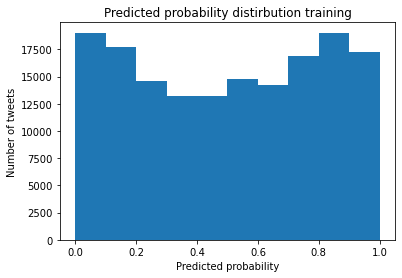

In [ ]:
plt.figure()
plt.hist(y_validation_proba_rfc[:,1])
plt.xlabel('Predicted probability')
plt.ylabel('Number of tweets')
plt.title('Predicted probability distirbution training')
plt.show()

In [ ]:
pickle.dump(rfc_model, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/rfc_model.pkl", "wb")) 

pickle.dump(y_train_pred_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_train_pred_rfc", 'wb'))
pickle.dump(y_train_proba_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_train_proba_rfc", 'wb'))
pickle.dump(y_validation_pred_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_validation_pred_rfc", 'wb'))
pickle.dump(y_validation_proba_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_validation_proba_rfc", 'wb'))
pickle.dump(y_chopsticks_pred_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_chopsticks_pred_rfc_binary", 'wb'))
pickle.dump(y_chopsticks_proba_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_chopsticks_proba_rfc", 'wb'))
pickle.dump(y_all_pred_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_all_pred_rfc_binary", 'wb'))
pickle.dump(y_all_proba_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_all_proba_rfc", 'wb'))

loading rfc: (2)

In [ ]:
rfc_model = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/rfc_model.pkl", 'rb'))

y_train_pred_rfc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_train_pred_rfc', allow_pickle=True)
y_train_proba_rfc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_train_proba_rfc', allow_pickle=True)
y_validation_pred_rfc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_validation_pred_rfc', allow_pickle=True)
y_validation_proba_rfc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_validation_proba_rfc', allow_pickle=True)
y_chopsticks_pred_rfc_binary = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_chopsticks_pred_rfc_binary', allow_pickle=True)
y_chopsticks_proba_rfc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_chopsticks_proba_rfc', allow_pickle=True)
y_all_pred_rfc_binary = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_all_pred_rfc_binary', allow_pickle=True)
y_all_proba_rfc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_all_proba_rfc', allow_pickle=True)

manual 140test/probability (3):

In [ ]:
# prediction on testing (once hyperparameters are tuned)
y_test_pred_rfc_binary = rfc_model.predict(X_test)
y_test_proba_rfc = rfc_model.predict_proba(X_test)

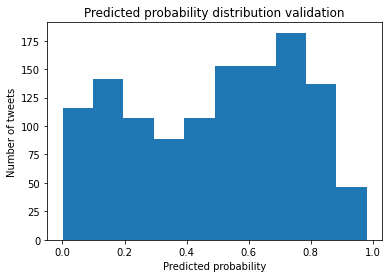

In [ ]:
plt.figure()
plt.hist(y_chopsticks_proba_rfc[:,1])
plt.xlabel('Predicted probability')
plt.ylabel('Number of tweets')
plt.title('Predicted probability distribution validation')
plt.show()

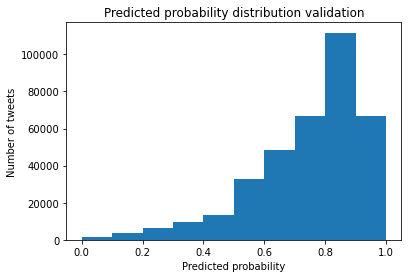

In [ ]:
plt.figure()
plt.hist(y_all_proba_svc[:,1])
plt.xlabel('Predicted probability')
plt.ylabel('Number of tweets')
plt.title('Predicted probability distribution validation')
plt.show()

In [ ]:
y_chopsticks_proba_rfc

array([[0.13371881, 0.86628119],
       [0.62599737, 0.37400263],
       [0.34943846, 0.65056154],
       ...,
       [0.44162291, 0.55837709],
       [0.50612236, 0.49387764],
       [0.23505884, 0.76494116]])

In [ ]:
topacc = 0
top_a = 0
top_b = 0
for i in range (10):
    a = 0.48+(i*0.01)
    for i in range (10):
        y_test_pred_rfc_binary = []
        b = 0.83-(i*0.01)
        for i in range (len(y_test_proba_rfc)):
            if (y_test_proba_rfc[i,1])<a:
                y_test_pred_rfc_binary.append(0)
            elif(y_test_proba_rfc[i,1])>b:
                y_test_pred_rfc_binary.append(4)
            else:
                y_test_pred_rfc_binary.append(2)
        accuracy = accuracy_score(y_test, y_test_pred_rfc_binary)
        if accuracy > topacc:
            topacc = accuracy
            top_a = a
            top_b = b
            top_y_pred = y_test_pred_rfc_binary
        print("acc = " + str(accuracy)+ " a = "+str(a)+" b = "+str(b))
            
        
print("overall top acc = "+str(topacc)+ " a = "+str(top_a)+" b = "+str(top_b))


acc = 0.6124497991967871 a = 0.48 b = 0.83
acc = 0.608433734939759 a = 0.48 b = 0.82
acc = 0.606425702811245 a = 0.48 b = 0.8099999999999999
acc = 0.6104417670682731 a = 0.48 b = 0.7999999999999999
acc = 0.608433734939759 a = 0.48 b = 0.7899999999999999
acc = 0.606425702811245 a = 0.48 b = 0.7799999999999999
acc = 0.6104417670682731 a = 0.48 b = 0.77
acc = 0.6104417670682731 a = 0.48 b = 0.76
acc = 0.606425702811245 a = 0.48 b = 0.75
acc = 0.608433734939759 a = 0.48 b = 0.74
acc = 0.6124497991967871 a = 0.49 b = 0.83
acc = 0.608433734939759 a = 0.49 b = 0.82
acc = 0.606425702811245 a = 0.49 b = 0.8099999999999999
acc = 0.6104417670682731 a = 0.49 b = 0.7999999999999999
acc = 0.608433734939759 a = 0.49 b = 0.7899999999999999
acc = 0.606425702811245 a = 0.49 b = 0.7799999999999999
acc = 0.6104417670682731 a = 0.49 b = 0.77
acc = 0.6104417670682731 a = 0.49 b = 0.76
acc = 0.606425702811245 a = 0.49 b = 0.75
acc = 0.608433734939759 a = 0.49 b = 0.74
acc = 0.6104417670682731 a = 0.5 b = 0.8

In [ ]:
#best cutoff values: a = 0.48 b = 0.83 (positive proba(second column))
y_test_pred_rfc = top_y_pred

In [ ]:
print('Testing performance')
print(classification_report(y_test, y_test_pred_rfc))

Testing performance
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       177
           2       0.47      0.61      0.53       139
           4       0.75      0.45      0.56       182

    accuracy                           0.61       498
   macro avg       0.63      0.61      0.60       498
weighted avg       0.64      0.61      0.61       498



In [ ]:
y_chopsticks_pred_rfc = []
for i in range (len(y_chopsticks_proba_rfc)):
            if (y_chopsticks_proba_rfc[i,1])<0.5:
                y_chopsticks_pred_rfc.append(0)
            elif(y_chopsticks_proba_rfc[i,1])>0.69:
                y_chopsticks_pred_rfc.append(4)
            else:
                y_chopsticks_pred_rfc.append(2)
y_all_pred_rfc = []
for i in range (len(y_all_proba_rfc)):
            if (y_all_proba_rfc[i,1])<0.5:
                y_all_pred_rfc.append(0)
            elif(y_all_proba_rfc[i,1])>0.69:
                y_all_pred_rfc.append(4)
            else:
                y_all_pred_rfc.append(2)

In [ ]:
# see where model predicted wrong
for i in range(len(y_test_pred_rfc)):
  if y_test[i] != y_test_pred_rfc[i]:
    tweet = corpus_test[i]
    print(f'y_true {y_test[i]}, y_pred {y_test_pred_rfc[i]}')
    print(tweet)
    print()

y_true 4, y_pred 2
Ok, first assesment of the #kindle2 ...it fucking rocks!!!

y_true 4, y_pred 2
@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :)

y_true 4, y_pred 2
@mikefish  Fair enough. But i have the Kindle2 and I think it's perfect  :)

y_true 4, y_pred 2
Jquery is my new best friend.

y_true 2, y_pred 4
Check this video out -- President Obama at the White House Correspondents' Dinner http://bit.ly/IMXUM

y_true 4, y_pred 2
House Correspondents dinner was last night whoopi, barbara &amp; sherri went, Obama got a standing ovation

y_true 4, y_pred 0
#lebron best athlete of our generation, if not all time (basketball related) I don't want to get into inter-sport debates about   __1/2

y_true 4, y_pred 2
i love lebron. http://bit.ly/PdHur

y_true 0, y_pred 2
@ludajuice Lebron is a Beast, but I'm still cheering 4 the A..til the end.

y_true 4, y_pred 2
@Pmillzz lebron IS THE BOSS

y_true 4, y

In [ ]:
pickle.dump(y_test_proba_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_test_proba_rfc", 'wb'))
pickle.dump(y_test_pred_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_test_pred_rfc", 'wb'))
pickle.dump(y_chopsticks_pred_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_chopsticks_pred_rfc", 'wb'))
pickle.dump(y_all_pred_rfc, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_all_pred_rfc", 'wb'))

loading probability: (3)

In [ ]:
y_test_proba_rfc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_test_proba_rfc', allow_pickle=True)
y_test_pred_rfc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_test_pred_rfc', allow_pickle=True)
y_chopsticks_pred_rfc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_chopsticks_pred_rfc', allow_pickle=True)
y_all_pred_rfc = np.load('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/y_all_pred_rfc', allow_pickle=True)

manual adding predictions: (4)

In [ ]:
df_all

,campaign,id,text,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,author_id,interval_start_date,interval_end_date,pred_label,pred_score
0,D&G twitter data,4688158780,#dolcegabbana# mynewfavourite.\nthe new layout...,2009-10-07T18:08:32.000Z,0,0,0,0,NaN,66089419,2009-10-07 00:00:00,2009-10-08 00:00:00,4,0.769291
1,D&G twitter data,4921523753,@BildArchiv grassy ass! RT @missdreens: http:/...,2009-10-16T17:48:13.000Z,0,0,0,0,6.733706e+07,78174799,2009-10-16 00:00:00,2009-10-17 00:00:00,4,0.726789
2,D&G twitter data,5655172931,RT: (Flashback) Alexandra Burke Wore D&G at El...,2009-11-12T17:59:32.000Z,0,0,0,0,NaN,84920988,2009-11-12 00:00:00,2009-11-13 00:00:00,2,0.668438
3,D&G twitter data,5800728832,@dolcegabbana no problem!,2009-11-17T17:11:35.000Z,0,0,0,0,8.577275e+07,15325349,2009-11-17 00:00:00,2009-11-18 00:00:00,4,0.835940
4,D&G twitter data,5799215897,"in other news, follow @dolcegabbana",2009-11-17T16:09:23.000Z,0,0,0,0,NaN,15325349,2009-11-17 00:00:00,2009-11-18 00:00:00,4,0.851562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361578,D&G twitter data,1416977616305893378,@JACKASSVOL2 I remember when @robdyrdek used t...,2021-07-19T04:26:04.000Z,0,0,0,0,1.272182e+09,255577662,2021-07-19 00:00:00,2021-07-20 00:00:00,4,0.693341
361579,D&G twitter data,1416963877976240129,So good I had to share! Check out all the item...,2021-07-19T03:31:29.000Z,0,0,0,0,NaN,912871375362195456,2021-07-19 00:00:00,2021-07-20 00:00:00,4,0.869560
361580,D&G twitter data,1416960790846840835,@sharonstone @dolcegabbana Stunning! You are s...,2021-07-19T03:19:13.000Z,0,0,3,0,1.949907e+09,28206173,2021-07-19 00:00:00,2021-07-20 00:00:00,4,0.993798
361581,D&G twitter data,1416916462913085440,@Memphis @amfAR @dolcegabbana Welcome to you h...,2021-07-19T00:23:04.000Z,0,1,0,0,2.799668e+08,1405574517272068098,2021-07-19 00:00:00,2021-07-20 00:00:00,4,0.991769


In [ ]:
df_chopsticks

,campaign,id,text,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,author_id,interval_start_date,interval_end_date,pred_label,pred_score
0,D&G chopsticks,1064202675682754560,"“Oh yes, I am familiar with East cultures, bec...",2018-11-18T17:04:24.000Z,0,0,0,0,NaN,420256379,2018-11-18 00:00:00,2018-11-19 00:00:00,4,0.866281
1,D&G chopsticks,1064178289407901697,"Stereotyping, arrogant and racist. Emphasizing...",2018-11-18T15:27:30.000Z,0,0,1,0,NaN,1019438827822186497,2018-11-18 00:00:00,2018-11-19 00:00:00,0,0.374003
2,D&G chopsticks,1064168151141691397,@dolcegabbana These videos don't make sense. W...,2018-11-18T14:47:13.000Z,3,1,29,0,8.577275e+07,2930050458,2018-11-18 00:00:00,2018-11-19 00:00:00,2,0.650562
3,D&G chopsticks,1064119452382433280,@dramapotatoe @dolcegabbana I never used chops...,2018-11-18T11:33:42.000Z,0,0,10,0,8.310888e+17,173770885,2018-11-18 00:00:00,2018-11-19 00:00:00,4,0.700431
4,D&G chopsticks,1064094563038449669,what’s the point of teaching chinese how to us...,2018-11-18T09:54:48.000Z,0,0,2,0,NaN,186317894,2018-11-18 00:00:00,2018-11-19 00:00:00,0,0.211429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,D&G chopsticks,1376112013764624386,"More than 2 years later, @dolcegabbana sues bl...",2021-03-28T10:00:45.000Z,0,0,0,0,NaN,19698834,2021-03-28 00:00:00,2021-03-29 00:00:00,4,0.880531
1227,D&G chopsticks,1377072093280395266,The blasphemy of Asian culture by Europe has b...,2021-03-31T01:35:46.000Z,0,0,0,0,NaN,1373645549832786035,2021-03-31 00:00:00,2021-04-01 00:00:00,0,0.219182
1228,D&G chopsticks,1380240487118823427,@silentparadise Gabbana appeared to call China...,2021-04-08T19:25:50.000Z,0,1,0,0,1.357498e+18,1391079446,2021-04-08 00:00:00,2021-04-09 00:00:00,2,0.558377
1229,D&G chopsticks,1387060244778340355,Part 2: How have #Westernbrands culturally off...,2021-04-27T15:05:07.000Z,1,1,1,0,NaN,1363483322773479432,2021-04-27 00:00:00,2021-04-28 00:00:00,0,0.493878


In [ ]:
y_chopsticks_proba_rfc

array([[0.13371881, 0.86628119],
       [0.62599737, 0.37400263],
       [0.34943846, 0.65056154],
       ...,
       [0.44162291, 0.55837709],
       [0.50612236, 0.49387764],
       [0.23505884, 0.76494116]])

In [ ]:
df_chopsticks['pred_label'] = y_chopsticks_pred_rfc
df_all['pred_label'] = y_all_pred_rfc

In [ ]:
df_chopsticks['pred_score'] = y_chopsticks_proba_rfc [:,1]
df_all[ 'pred_score'] = y_all_proba_rfc [:,1]

In [ ]:
# Changing object type column to datetime
df_chopsticks['interval_start_date'] = pd.to_datetime(df_chopsticks['interval_start_date'])
df_chopsticks['created_at'] = pd.to_datetime(df_chopsticks['created_at'])
df_chopsticks['date'] = df_chopsticks['created_at'].dt.date # Creating new column with just the date
df_chopsticks['date'] = pd.to_datetime(df_chopsticks['date'])

# get week start date to aggregate over weeks
df_chopsticks['week_start_date'] = df_chopsticks['date'].apply(lambda x: x - datetime.timedelta(days=x.weekday()))
df_chopsticks['week_start_date'] = df_chopsticks['week_start_date'].dt.date
df_chopsticks.head()

,campaign,id,text,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,author_id,interval_start_date,interval_end_date,pred_label,pred_score,date,week_start_date
0,D&G chopsticks,1064202675682754560,"“Oh yes, I am familiar with East cultures, bec...",2018-11-18 17:04:24+00:00,0,0,0,0,NaN,420256379,2018-11-18,2018-11-19 00:00:00,4,0.866281,2018-11-18,2018-11-12
1,D&G chopsticks,1064178289407901697,"Stereotyping, arrogant and racist. Emphasizing...",2018-11-18 15:27:30+00:00,0,0,1,0,NaN,1019438827822186497,2018-11-18,2018-11-19 00:00:00,0,0.374003,2018-11-18,2018-11-12
2,D&G chopsticks,1064168151141691397,@dolcegabbana These videos don't make sense. W...,2018-11-18 14:47:13+00:00,3,1,29,0,8.577275e+07,2930050458,2018-11-18,2018-11-19 00:00:00,2,0.650562,2018-11-18,2018-11-12
3,D&G chopsticks,1064119452382433280,@dramapotatoe @dolcegabbana I never used chops...,2018-11-18 11:33:42+00:00,0,0,10,0,8.310888e+17,173770885,2018-11-18,2018-11-19 00:00:00,4,0.700431,2018-11-18,2018-11-12
4,D&G chopsticks,1064094563038449669,what’s the point of teaching chinese how to us...,2018-11-18 09:54:48+00:00,0,0,2,0,NaN,186317894,2018-11-18,2018-11-19 00:00:00,0,0.211429,2018-11-18,2018-11-12


In [ ]:
# Changing object type column to datetime
df_all['interval_start_date'] = pd.to_datetime(df_all['interval_start_date'])
df_all['created_at'] = pd.to_datetime(df_all['created_at'])
df_all['date'] = df_all['created_at'].dt.date # Creating new column with just the date
df_all['date'] = pd.to_datetime(df_all['date'])

# get week start date to aggregate over weeks
df_all['week_start_date'] = df_all['date'].apply(lambda x: x - datetime.timedelta(days=x.weekday()))
df_all['week_start_date'] = df_all['week_start_date'].dt.date
df_all.head()

,campaign,id,text,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,author_id,interval_start_date,interval_end_date,pred_label,pred_score,date,week_start_date
0,D&G twitter data,4688158780,#dolcegabbana# mynewfavourite.\nthe new layout...,2009-10-07 18:08:32+00:00,0,0,0,0,NaN,66089419,2009-10-07,2009-10-08 00:00:00,4,0.769291,2009-10-07,2009-10-05
1,D&G twitter data,4921523753,@BildArchiv grassy ass! RT @missdreens: http:/...,2009-10-16 17:48:13+00:00,0,0,0,0,67337055.0,78174799,2009-10-16,2009-10-17 00:00:00,4,0.726789,2009-10-16,2009-10-12
2,D&G twitter data,5655172931,RT: (Flashback) Alexandra Burke Wore D&G at El...,2009-11-12 17:59:32+00:00,0,0,0,0,NaN,84920988,2009-11-12,2009-11-13 00:00:00,2,0.668438,2009-11-12,2009-11-09
3,D&G twitter data,5800728832,@dolcegabbana no problem!,2009-11-17 17:11:35+00:00,0,0,0,0,85772748.0,15325349,2009-11-17,2009-11-18 00:00:00,4,0.835940,2009-11-17,2009-11-16
4,D&G twitter data,5799215897,"in other news, follow @dolcegabbana",2009-11-17 16:09:23+00:00,0,0,0,0,NaN,15325349,2009-11-17,2009-11-18 00:00:00,4,0.851562,2009-11-17,2009-11-16


In [ ]:
# positive is going to be defined as greater than 80% prediction score that it is positive (adjustable based on threshold)
df_all_pos = df_all[(df_all['pred_label'] == 4)&(df_all['pred_score']>0.8)]

# negative is going to be defined as greater than 80% prediction score that it is negative (adjustable based on threshold)
df_all_neg = df_all[(df_all['pred_label'] == 0)&(df_all['pred_score']<0.25)]

In [ ]:
# positive is going to be defined as greater than 80% prediction score that it is positive (adjustable based on threshold)
df_chopsticks_pos = df_chopsticks[(df_chopsticks['pred_label'] == 4)&(df_chopsticks['pred_score']>0.9)]

# negative is going to be defined as greater than 80% prediction score that it is negative (adjustable based on threshold)
df_chopsticks_neg = df_chopsticks[(df_chopsticks['pred_label'] == 0)&(df_chopsticks['pred_score']<0.25)]

In [ ]:
df_chopsticks_pos

,campaign,id,text,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,author_id,interval_start_date,interval_end_date,pred_label,pred_score,date,week_start_date
10,D&G chopsticks,1064994292257632257,Dolce &amp; Gabbana’s ‘DG Loves China’ campaig...,2018-11-20 21:30:00+00:00,238,124,475,103,NaN,15317676,2018-11-20,2018-11-21 00:00:00,4,0.929922,2018-11-20,2018-11-19
13,D&G chopsticks,1064974164937883649,Dolce and Gabbana accused of racism in Chinese...,2018-11-20 20:10:01+00:00,0,0,0,0,NaN,19544141,2018-11-20,2018-11-21 00:00:00,4,0.974747,2018-11-20,2018-11-19
23,D&G chopsticks,1064913781468397568,Dolce and Gabbana accused of racism in Chinese...,2018-11-20 16:10:05+00:00,0,0,0,0,NaN,19544141,2018-11-20,2018-11-21 00:00:00,4,0.974747,2018-11-20,2018-11-19
57,D&G chopsticks,1065393754784260096,The meanings behind Chopsticks 🥢 (with subs) @...,2018-11-21 23:57:19+00:00,1,0,1,0,NaN,3194526254,2018-11-21,2018-11-22 00:00:00,4,0.978054,2018-11-21,2018-11-19
74,D&G chopsticks,1065368024805453824,A very good question... https://t.co/1Iwj8Z8TPO,2018-11-21 22:15:05+00:00,128,11,284,15,NaN,24190981,2018-11-21,2018-11-22 00:00:00,4,0.930972,2018-11-21,2018-11-19
204,D&G chopsticks,1065255897721593856,@dolcegabbana I would never mind teaching you ...,2018-11-21 14:49:32+00:00,0,0,0,0,8.577275e+07,1061070373515481088,2018-11-21,2018-11-22 00:00:00,4,0.911788,2018-11-21,2018-11-19
223,D&G chopsticks,1065240498175205376,#RT @DRUDGE_REPORT: 'Chopsticks' ad... https:/...,2018-11-21 13:48:20+00:00,0,0,0,0,NaN,738878665300283392,2018-11-21,2018-11-22 00:00:00,4,0.970399,2018-11-21,2018-11-19
255,D&G chopsticks,1065218993156440065,Dolce &amp; Gabbana spark ‘racism’ backlash wi...,2018-11-21 12:22:53+00:00,2,0,0,1,NaN,34655603,2018-11-21,2018-11-22 00:00:00,4,0.977698,2018-11-21,2018-11-19
256,D&G chopsticks,1065218200453865473,"Ops, they did it again! \nD&amp;G: Done &amp; ...",2018-11-21 12:19:44+00:00,0,0,0,0,NaN,36878416,2018-11-21,2018-11-22 00:00:00,4,0.921924,2018-11-21,2018-11-19
321,D&G chopsticks,1065080849929027584,Dolce &amp; Gabbana Spark Racism Controversy w...,2018-11-21 03:13:57+00:00,0,0,0,0,NaN,1102433767,2018-11-21,2018-11-22 00:00:00,4,0.980477,2018-11-21,2018-11-19


In [ ]:
pickle.dump(df_chopsticks, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_chopsticks.pkl", "wb")) 
pickle.dump(df_chopsticks_pos, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_chopsticks_pos.pkl", "wb")) 
pickle.dump(df_chopsticks_neg, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_chopsticks_neg.pkl", "wb")) 

pickle.dump(df_all, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_all.pkl", "wb")) 
pickle.dump(df_all_pos, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_all_pos.pkl", "wb")) 
pickle.dump(df_all_neg, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_all_neg.pkl", "wb")) 


loading predictions: (4)

In [ ]:
df_chopsticks = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_chopsticks.pkl')
df_chopsticks_pos = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_chopsticks_pos.pkl')
df_chopsticks_neg = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_chopsticks_neg.pkl')

df_all = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_all.pkl')
df_all_pos = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_all_pos.pkl')
df_all_neg = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/df_all_neg.pkl')

In [ ]:
df_chopsticks_pos

,campaign,id,text,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,author_id,interval_start_date,interval_end_date,pred_label,pred_score,date,week_start_date,counting
62,D&G chopsticks,1065389528209182720,"Hey, @dolcegabbana come to Steveston where Chi...",2018-11-21 23:40:32+00:00,0,0,1,0,NaN,2889616697,2018-11-21,2018-11-22 00:00:00,4,0.816965,2018-11-21,2018-11-19,1
74,D&G chopsticks,1065368024805453824,A very good question... https://t.co/1Iwj8Z8TPO,2018-11-21 22:15:05+00:00,128,11,284,15,NaN,24190981,2018-11-21,2018-11-22 00:00:00,4,0.889695,2018-11-21,2018-11-19,1
95,D&G chopsticks,1065350391087448064,@dustette your Tweet was quoted in an article ...,2018-11-21 21:05:01+00:00,0,0,0,0,1.491954e+07,3069279631,2018-11-21,2018-11-22 00:00:00,4,0.870003,2018-11-21,2018-11-19,1
104,D&G chopsticks,1065346269885988864,This is how chopsticks should be show to the w...,2018-11-21 20:48:38+00:00,1,0,1,0,NaN,599431444,2018-11-21,2018-11-22 00:00:00,4,0.856417,2018-11-21,2018-11-19,1
113,D&G chopsticks,1065335035451060224,The best way to show respect is to better unde...,2018-11-21 20:04:00+00:00,4,2,21,0,NaN,387398904,2018-11-21,2018-11-22 00:00:00,4,0.862480,2018-11-21,2018-11-19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,D&G chopsticks,1150936515238719489,#PRO285 Diversity: Dolce &amp; Gabbana's new ...,2019-07-16 01:13:43+00:00,0,0,0,0,NaN,1150785061437857792,2019-07-16,2019-07-17 00:00:00,4,0.834600,2019-07-16,2019-07-15,1
1177,D&G chopsticks,1159471650938793990,@extracelestial we wrote about this ha ha ha h...,2019-08-08 14:29:18+00:00,0,1,1,0,2.575380e+07,25753805,2019-08-08,2019-08-09 00:00:00,4,0.858194,2019-08-08,2019-08-05,1
1184,D&G chopsticks,1181713221478162432,@frynaomifry This one is up there: https://t.c...,2019-10-08 23:29:21+00:00,0,1,2,0,2.353654e+09,25684077,2019-10-08,2019-10-09 00:00:00,4,0.811492,2019-10-08,2019-10-07,1
1203,D&G chopsticks,1231838166035947521,@UFPRDepartment I'm really wondering if anyone...,2020-02-24 07:07:59+00:00,0,0,1,0,1.216519e+18,1216518574409506817,2020-02-24,2020-02-25 00:00:00,4,0.925660,2020-02-24,2020-02-24,1


manually sorting by week (5):

In [ ]:
# aggregate data and get aggregated statistics
pos_byweek_all = df_all_pos.groupby(by=['week_start_date']).agg({'retweet_count': ['sum']}).reset_index() # for positive tweets, get total retweets each week (sum of num retweets column over each week)
pos_byweek_all.columns = ['date', 'total_retweets']

neg_byweek_all = df_all_neg.groupby(by=['week_start_date']).agg({'retweet_count': ['sum']}).reset_index() # for negative tweets, get total retweets each week (sum of num retweets column over each week)
neg_byweek_all.columns = ['date', 'total_retweets']

In [ ]:
# aggregate data and get aggregated statistics
pos_byweek_chopsticks = df_chopsticks_pos.groupby(by=['week_start_date']).agg({'retweet_count': ['sum']}).reset_index() # for positive tweets, get total retweets each week (sum of num retweets column over each week)
pos_byweek_chopsticks.columns = ['date', 'total_retweets']

neg_byweek_chopsticks = df_chopsticks_neg.groupby(by=['week_start_date']).agg({'retweet_count': ['sum']}).reset_index() # for negative tweets, get total retweets each week (sum of num retweets column over each week)
neg_byweek_chopsticks.columns = ['date', 'total_retweets']

In [ ]:
# for each week, get list of tweets with the highest number of retweets (which you can manually review to see what was trending that week)
top_tweets_peak_weeks_all = df_all.sort_values(by='retweet_count', ascending=False)
top_tweets_peak_weeks_all = top_tweets_peak_weeks_all.groupby('week_start_date').head(10).sort_values(by=['week_start_date', 'retweet_count'], ascending=False)
top_tweets_peak_weeks_all
#top_tweets_peak_weeks.to_csv(os.path.join(data_dir, 'top_tweets_peak_weeks.csv'), index=False)

,campaign,id,text,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,author_id,interval_start_date,interval_end_date,pred_label,pred_score,date,week_start_date
361542,D&G twitter data,1417106954741325827,Matt Damon wore a classic #DolceGabbana black ...,2021-07-19 13:00:01+00:00,21,1,180,0,NaN,85772748,2021-07-19,2021-07-20 00:00:00,4,0.734680,2021-07-19,2021-07-19
361507,D&G twitter data,1417167356082761734,The iconic Light Blue story continues with Lig...,2021-07-19 17:00:02+00:00,19,2,146,1,NaN,85772748,2021-07-19,2021-07-20 00:00:00,4,0.817985,2021-07-19,2021-07-19
361545,D&G twitter data,1417092685521997825,"""manía"" love with the first sight 💘💘passion 💞💞...",2021-07-19 12:03:19+00:00,16,0,19,0,NaN,1369604949487804418,2021-07-19,2021-07-20 00:00:00,4,0.866885,2021-07-19,2021-07-19
361548,D&G twitter data,1417086472038010881,Dolce &amp; Gabbana to Launch Exclusive #NFT o...,2021-07-19 11:38:37+00:00,14,0,16,0,NaN,958321713439272960,2021-07-19,2021-07-20 00:00:00,4,0.840854,2021-07-19,2021-07-19
361488,D&G twitter data,1417219593496666119,A wonderful new edition of NFT Review is out ❤...,2021-07-19 20:27:36+00:00,13,0,27,2,NaN,1371722347338739712,2021-07-19,2021-07-20 00:00:00,4,0.870884,2021-07-19,2021-07-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,D&G twitter data,5831250764,RT @dolcegabbana: A beautiful new epoch for Do...,2009-11-18 17:05:38+00:00,0,0,0,0,NaN,35974972,2009-11-18,2009-11-19 00:00:00,4,0.923105,2009-11-18,2009-11-16
6,D&G twitter data,5831259585,Yes! RT @homotography twitter got a whole lot ...,2009-11-18 17:05:59+00:00,0,0,0,0,NaN,18248458,2009-11-18,2009-11-19 00:00:00,4,0.821401,2009-11-18,2009-11-16
2,D&G twitter data,5655172931,RT: (Flashback) Alexandra Burke Wore D&G at El...,2009-11-12 17:59:32+00:00,0,0,0,0,NaN,84920988,2009-11-12,2009-11-13 00:00:00,2,0.668438,2009-11-12,2009-11-09
1,D&G twitter data,4921523753,@BildArchiv grassy ass! RT @missdreens: http:/...,2009-10-16 17:48:13+00:00,0,0,0,0,67337055.0,78174799,2009-10-16,2009-10-17 00:00:00,4,0.726789,2009-10-16,2009-10-12


In [ ]:
# for each week, get list of tweets with the highest number of retweets (which you can manually review to see what was trending that week)
top_tweets_peak_weeks_chopsticks = df_chopsticks.sort_values(by='retweet_count', ascending=False)
top_tweets_peak_weeks_chopsticks = top_tweets_peak_weeks_chopsticks.groupby('week_start_date').head(10).sort_values(by=['week_start_date', 'retweet_count'], ascending=False)
top_tweets_peak_weeks_chopsticks
#top_tweets_peak_weeks.to_csv(os.path.join(data_dir, 'top_tweets_peak_weeks.csv'), index=False)

,campaign,id,text,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,author_id,interval_start_date,interval_end_date,pred_label,pred_score,date,week_start_date
1230,D&G chopsticks,1409919467077971972,@angus_young61 This?\n\nhttps://t.co/HYn1n1CzO...,2021-06-29 16:59:30+00:00,0,0,0,0,9.648693e+08,133460465,2021-06-29,2021-06-30 00:00:00,4,0.764941,2021-06-29,2021-06-28
1229,D&G chopsticks,1387060244778340355,Part 2: How have #Westernbrands culturally off...,2021-04-27 15:05:07+00:00,1,1,1,0,NaN,1363483322773479432,2021-04-27,2021-04-28 00:00:00,0,0.493878,2021-04-27,2021-04-26
1228,D&G chopsticks,1380240487118823427,@silentparadise Gabbana appeared to call China...,2021-04-08 19:25:50+00:00,0,1,0,0,1.357498e+18,1391079446,2021-04-08,2021-04-09 00:00:00,2,0.558377,2021-04-08,2021-04-05
1227,D&G chopsticks,1377072093280395266,The blasphemy of Asian culture by Europe has b...,2021-03-31 01:35:46+00:00,0,0,0,0,NaN,1373645549832786035,2021-03-31,2021-04-01 00:00:00,0,0.219182,2021-03-31,2021-03-29
1226,D&G chopsticks,1376112013764624386,"More than 2 years later, @dolcegabbana sues bl...",2021-03-28 10:00:45+00:00,0,0,0,0,NaN,19698834,2021-03-28,2021-03-29 00:00:00,4,0.880531,2021-03-28,2021-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,D&G chopsticks,1064119452382433280,@dramapotatoe @dolcegabbana I never used chops...,2018-11-18 11:33:42+00:00,0,0,10,0,8.310888e+17,173770885,2018-11-18,2018-11-19 00:00:00,4,0.700431,2018-11-18,2018-11-12
4,D&G chopsticks,1064094563038449669,what’s the point of teaching chinese how to us...,2018-11-18 09:54:48+00:00,0,0,2,0,NaN,186317894,2018-11-18,2018-11-19 00:00:00,0,0.211429,2018-11-18,2018-11-12
7,D&G chopsticks,1064058094169206784,"Oh, I’m surprised that DG knows chopsticks ARE...",2018-11-18 07:29:53+00:00,0,0,0,0,NaN,1004937097751375872,2018-11-18,2018-11-19 00:00:00,4,0.732841,2018-11-18,2018-11-12
8,D&G chopsticks,1064041382648705024,"@dolcegabbana Please cancel the Shanghai show,...",2018-11-18 06:23:29+00:00,0,1,20,0,8.577275e+07,1052812245921685504,2018-11-18,2018-11-19 00:00:00,0,0.257205,2018-11-18,2018-11-12


In [ ]:
pickle.dump(pos_byweek_chopsticks, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/pos_byweek_chopsticks.pkl", "wb")) 
pickle.dump(neg_byweek_chopsticks, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/neg_byweek_chopsticks.pkl", "wb")) 
pickle.dump(top_tweets_peak_weeks_chopsticks, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/top_tweets_peak_weeks_chopsticks.pkl", "wb")) 

pickle.dump(pos_byweek_all, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/pos_byweek_all.pkl", "wb")) 
pickle.dump(neg_byweek_all, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/neg_byweek_all.pkl", "wb")) 
pickle.dump(top_tweets_peak_weeks_all, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/top_tweets_peak_weeks_all.pkl", "wb")) 


loading by week: (5)

In [ ]:
pos_byweek_chopsticks = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/pos_byweek_chopsticks.pkl')
neg_byweek_chopsticks = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/neg_byweek_chopsticks.pkl')
top_tweets_peak_weeks_chopsticks = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/top_tweets_peak_weeks_chopsticks.pkl')


pos_byweek_all = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/pos_byweek_all.pkl')
neg_byweek_all = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/neg_byweek_all.pkl')
top_tweets_peak_weeks_all = pd.read_pickle('C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/top_tweets_peak_weeks_all.pkl')

manual tweet #: (5b)

In [ ]:
countlist = []
for i in range (len(df_all_pos)):
    countlist.append(1)
    
df_all_pos['counting'] = countlist
df_all_pos

pos_byweek_tweets_all = df_all_pos.groupby(by=['week_start_date']).agg({'counting': ['sum']}).reset_index() 
pos_byweek_tweets_all.columns = ['date', '# of tweets']
pos_byweek_tweets_all


,date,# of tweets
0,2009-11-16,8
1,2009-11-23,11
2,2009-11-30,11
3,2009-12-07,6
4,2009-12-14,17
...,...,...
605,2021-06-21,282
606,2021-06-28,377
607,2021-07-05,293
608,2021-07-12,525


In [ ]:
countlist = []
for i in range (len(df_chopsticks_pos)):
    countlist.append(1)
    
df_chopsticks_pos['counting'] = countlist
df_chopsticks_pos

pos_byweek_tweets_chopsticks = df_chopsticks_pos.groupby(by=['week_start_date']).agg({'counting': ['sum']}).reset_index() 
pos_byweek_tweets_chopsticks.columns = ['date', '# of tweets']
pos_byweek_tweets_chopsticks

,date,# of tweets
0,2018-11-19,47
1,2018-11-26,7
2,2019-01-21,11
3,2019-02-04,1
4,2019-02-18,1
5,2019-04-01,3
6,2019-04-08,43
7,2019-04-15,4
8,2019-04-29,1
9,2019-05-06,1


In [ ]:
countlist = []
for i in range (len(df_chopsticks_neg)):
    countlist.append(1)
    
df_chopsticks_neg['counting'] = countlist
df_chopsticks_neg

neg_byweek_tweets_chopsticks = df_chopsticks_neg.groupby(by=['week_start_date']).agg({'counting': ['sum']}).reset_index() 
neg_byweek_tweets_chopsticks.columns = ['date', '# of tweets']
neg_byweek_tweets_chopsticks

,date,# of tweets
0,2018-11-12,1
1,2018-11-19,251
2,2018-11-26,21
3,2018-12-03,4
4,2018-12-10,1
5,2018-12-24,4
6,2019-01-21,2
7,2019-01-28,1
8,2019-02-04,2
9,2019-02-11,1


In [ ]:
countlist = []
for i in range (len(df_all_neg)):
    countlist.append(1)
    
df_all_neg['counting'] = countlist
df_all_neg

neg_byweek_tweets_all = df_all_neg.groupby(by=['week_start_date']).agg({'counting': ['sum']}).reset_index() 
neg_byweek_tweets_all.columns = ['date', '# of tweets']
neg_byweek_tweets_all

,date,# of tweets
0,2009-12-14,1
1,2010-01-04,1
2,2010-01-11,2
3,2010-01-18,1
4,2010-02-15,1
...,...,...
585,2021-06-14,5
586,2021-06-21,11
587,2021-06-28,8
588,2021-07-05,9


In [ ]:
pickle.dump(neg_byweek_tweets_chopsticks, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/neg_byweek_tweets_chopsticks.pkl", "wb")) 
pickle.dump(neg_byweek_tweets_all, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/neg_byweek_tweets_all.pkl", "wb")) 
pickle.dump(pos_byweek_tweets_chopsticks, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/pos_byweek_tweets_chopsticks.pkl", "wb")) 
pickle.dump(pos_byweek_tweets_all, open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/pos_byweek_tweets_all.pkl", "wb")) 

loading tweet #: (5b)

In [ ]:
neg_byweek_tweets_chopsticks = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/neg_byweek_tweets_chopsticks.pkl", 'rb'))
neg_byweek_tweets_all = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/neg_byweek_tweets_all.pkl", 'rb'))
pos_byweek_tweets_chopsticks = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/pos_byweek_tweets_chopsticks.pkl", 'rb'))
pos_byweek_tweets_all = pickle.load(open("C:/Users/flore/Desktop/UTS S5/STEM fellowship/rfc/pos_byweek_tweets_all.pkl", 'rb'))

manual graph making: (6)

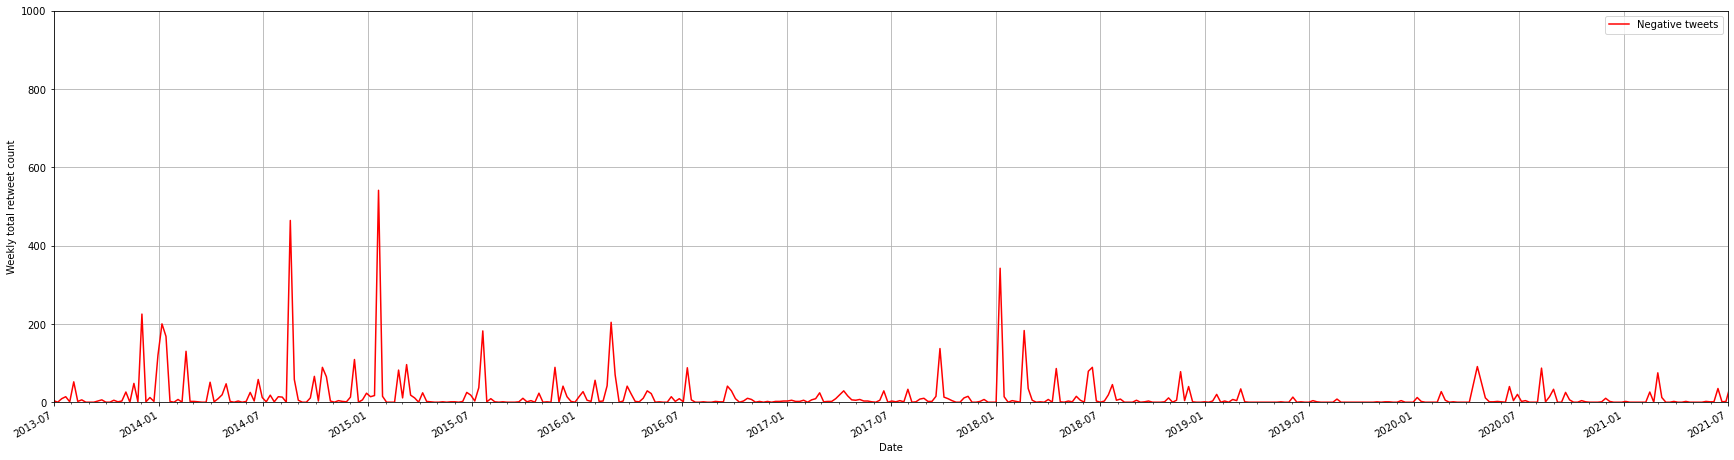

In [ ]:
# plot number of retweets over time (aggregated over each week) for positive and negative tweets
fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(neg_byweek_all["date"], neg_byweek_all['total_retweets'], c='red', label='Negative tweets')

"""
# format the vertical lines and annotations
y = {
  0: 20000,
  1: 40000,
  2: 30000,
  3: 60000,
  4: 80000,
  5: 50000,
  6: 40000,
  7: 40000,
  8: 60000,
  9: 80000,
  10: 40000,
  11: 140000,
  12: 120000,
  13: 100000,
  14: 160000,
  15: 160000,
  16: 100000,
  17: 120000,
}
"""

y_offset = 10000
left_align = [1, 4, 5, 8, 9, 10, 15, 16, 17]

"""
# vertical line for major events
for i in range(len(dates)):
  date = dates[i]
  event = events[i]
  if i in left_align:
    align = 'left'
  else:
    align = 'right'
  plt.axvline(x=date, color='grey', linestyle=':')
  ax.text(date, y[i]-y_offset, event, ha=align, size=10)
"""

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest half of year.
datemin = np.datetime64(datetime.date(2013, 7, 1), 'm')
datemax = np.datetime64(datetime.date(2021, 7, 1), 'm')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Label the axes
ax.set(xlabel='Date', ylabel='Weekly total retweet count')
ax.set_ylim([0, 1000]) # scale the y-axis range

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()
plt.legend() # add the legend

plt.show()

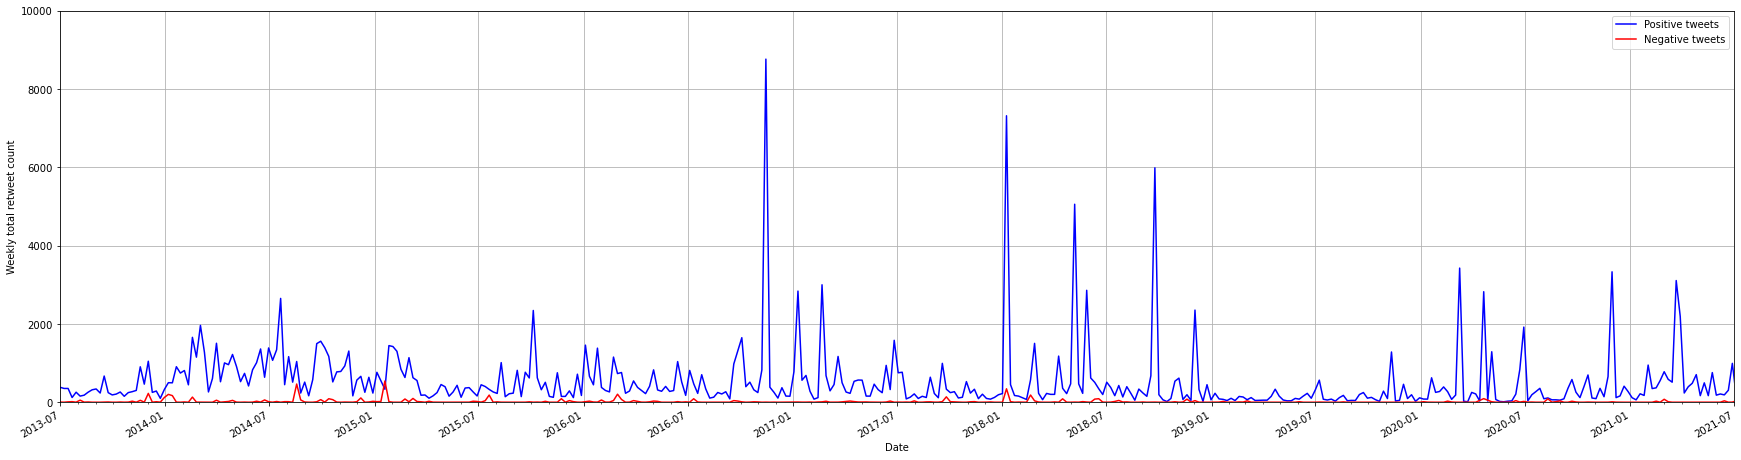

In [ ]:
# plot number of retweets over time (aggregated over each week) for positive and negative tweets
fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(pos_byweek_all["date"], pos_byweek_all['total_retweets'], c='blue', label='Positive tweets')
ax.plot(neg_byweek_all["date"], neg_byweek_all['total_retweets'], c='red', label='Negative tweets')

"""
# format the vertical lines and annotations
y = {
  0: 20000,
  1: 40000,
  2: 30000,
  3: 60000,
  4: 80000,
  5: 50000,
  6: 40000,
  7: 40000,
  8: 60000,
  9: 80000,
  10: 40000,
  11: 140000,
  12: 120000,
  13: 100000,
  14: 160000,
  15: 160000,
  16: 100000,
  17: 120000,
}
"""

y_offset = 10000
left_align = [1, 4, 5, 8, 9, 10, 15, 16, 17]

"""
# vertical line for major events
for i in range(len(dates)):
  date = dates[i]
  event = events[i]
  if i in left_align:
    align = 'left'
  else:
    align = 'right'
  plt.axvline(x=date, color='grey', linestyle=':')
  ax.text(date, y[i]-y_offset, event, ha=align, size=10)
"""

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest half of year.
datemin = np.datetime64(datetime.date(2013, 7, 1), 'm')
datemax = np.datetime64(datetime.date(2021, 7, 1), 'm')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Label the axes
ax.set(xlabel='Date', ylabel='Weekly total retweet count')
ax.set_ylim([0, 10000]) # scale the y-axis range

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()
plt.legend() # add the legend

plt.show()

samething but tweet #: (6b)

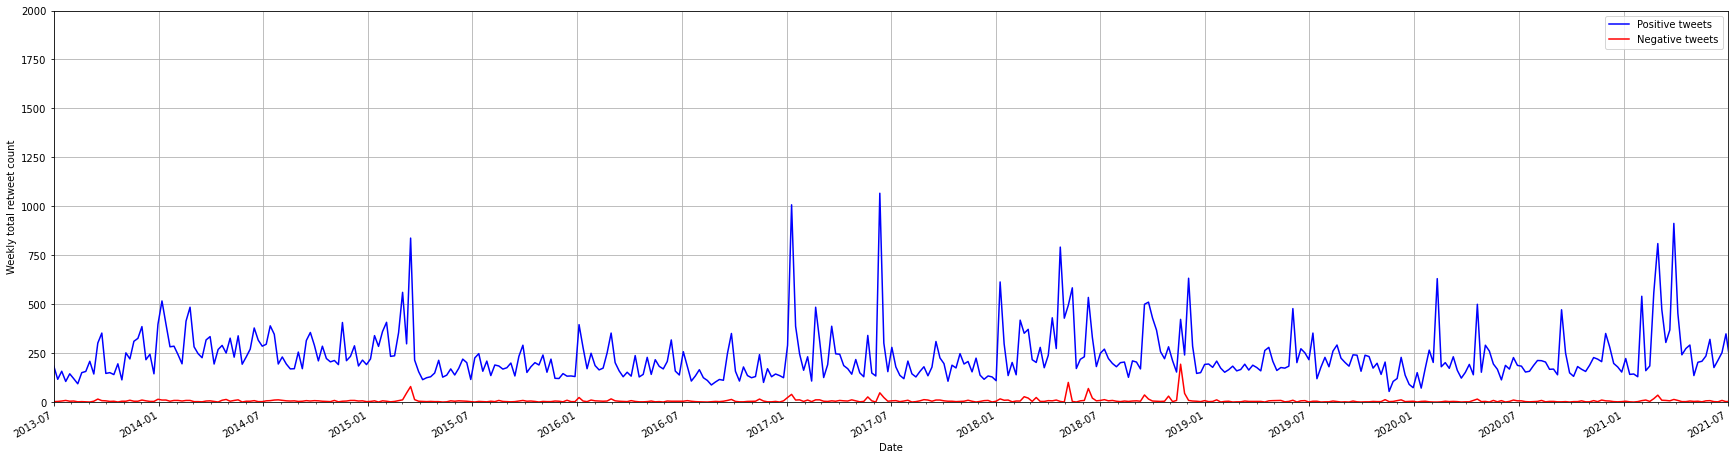

In [ ]:
# plot number of retweets over time (aggregated over each week) for positive and negative tweets
fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(pos_byweek_tweets_all["date"], pos_byweek_tweets_all['# of tweets'], c='blue', label='Positive tweets')
ax.plot(neg_byweek_tweets_all["date"], neg_byweek_tweets_all['# of tweets'], c='red', label='Negative tweets')

"""
# format the vertical lines and annotations
y = {
  0: 20000,
  1: 40000,
  2: 30000,
  3: 60000,
  4: 80000,
  5: 50000,
  6: 40000,
  7: 40000,
  8: 60000,
  9: 80000,
  10: 40000,
  11: 140000,
  12: 120000,
  13: 100000,
  14: 160000,
  15: 160000,
  16: 100000,
  17: 120000,
}
"""

y_offset = 10000
left_align = [1, 4, 5, 8, 9, 10, 15, 16, 17]

"""
# vertical line for major events
for i in range(len(dates)):
  date = dates[i]
  event = events[i]
  if i in left_align:
    align = 'left'
  else:
    align = 'right'
  plt.axvline(x=date, color='grey', linestyle=':')
  ax.text(date, y[i]-y_offset, event, ha=align, size=10)
"""

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest half of year.
datemin = np.datetime64(datetime.date(2013, 7, 1), 'm')
datemax = np.datetime64(datetime.date(2021, 7, 1), 'm')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Label the axes
ax.set(xlabel='Date', ylabel='Weekly total retweet count')
ax.set_ylim([0, 2000]) # scale the y-axis range

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()
plt.legend() # add the legend

plt.show()

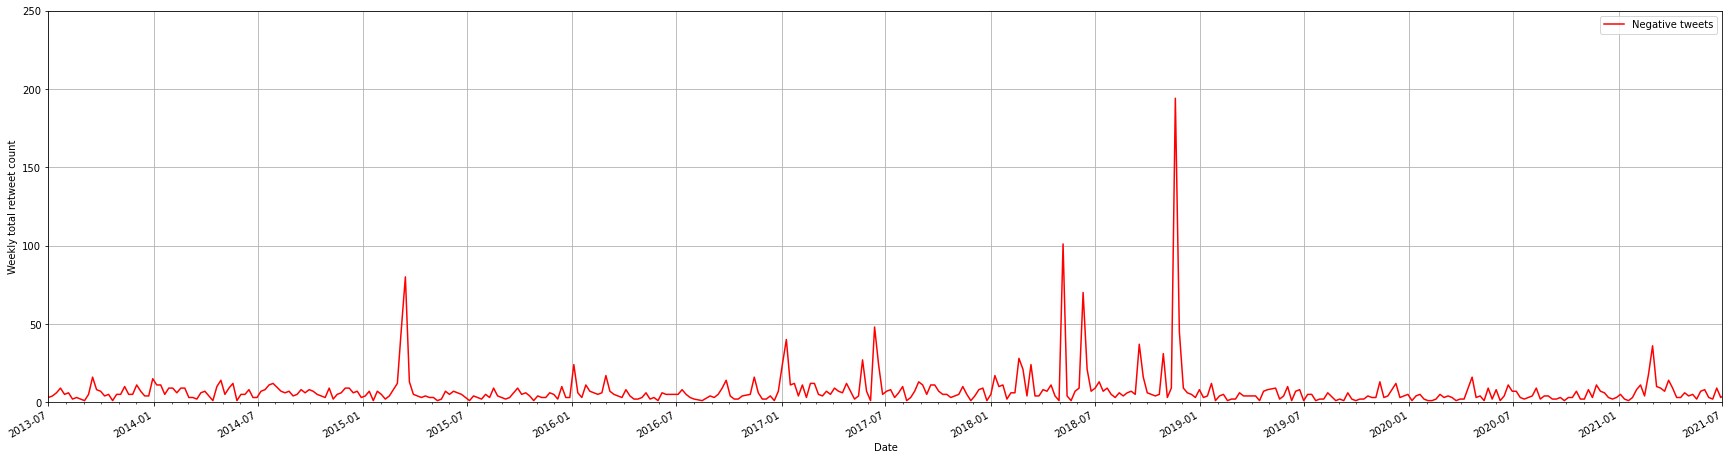

In [ ]:
# plot number of retweets over time (aggregated over each week) for positive and negative tweets
fig, ax = plt.subplots(figsize=(30, 8))
#ax.plot(pos_byweek_tweets_chopsticks["date"], pos_byweek_tweets_chopsticks['# of tweets'], c='blue', label='Positive tweets')
ax.plot(neg_byweek_tweets_all["date"], neg_byweek_tweets_all['# of tweets'], c='red', label='Negative tweets')

"""
# format the vertical lines and annotations
y = {
  0: 20000,
  1: 40000,
  2: 30000,
  3: 60000,
  4: 80000,
  5: 50000,
  6: 40000,
  7: 40000,
  8: 60000,
  9: 80000,
  10: 40000,
  11: 140000,
  12: 120000,
  13: 100000,
  14: 160000,
  15: 160000,
  16: 100000,
  17: 120000,
}
"""

y_offset = 10000
left_align = [1, 4, 5, 8, 9, 10, 15, 16, 17]

"""
# vertical line for major events
for i in range(len(dates)):
  date = dates[i]
  event = events[i]
  if i in left_align:
    align = 'left'
  else:
    align = 'right'
  plt.axvline(x=date, color='grey', linestyle=':')
  ax.text(date, y[i]-y_offset, event, ha=align, size=10)
"""

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest half of year.
datemin = np.datetime64(datetime.date(2013, 7, 1), 'm')
datemax = np.datetime64(datetime.date(2021, 7, 1), 'm')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Label the axes
ax.set(xlabel='Date', ylabel='Weekly total retweet count')
ax.set_ylim([0, 250]) # scale the y-axis range

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()
plt.legend() # add the legend

plt.show()